# Standard UCB1 _ MonteCarlo Study Results


In [1]:
library("plyr")
library("ggplot2")

results <- read.csv("../input/algorithmucb1/algorithmucb_algorithmucb1_results.tsv",sep="\t", header = FALSE)
names(results) <- c("Sim", "T", "ChosenArm", "Reward", "CumulativeReward")

head(results)

,Sim,T,ChosenArm,Reward,CumulativeReward
,<int>,<int>,<int>,<dbl>,<dbl>
1,1,1,0,0,0
2,1,2,1,0,0
3,1,3,2,1,1
4,1,4,3,0,1
5,1,5,4,1,2
6,1,6,2,1,3


## Approach2. Track the average reward at Each point in Time

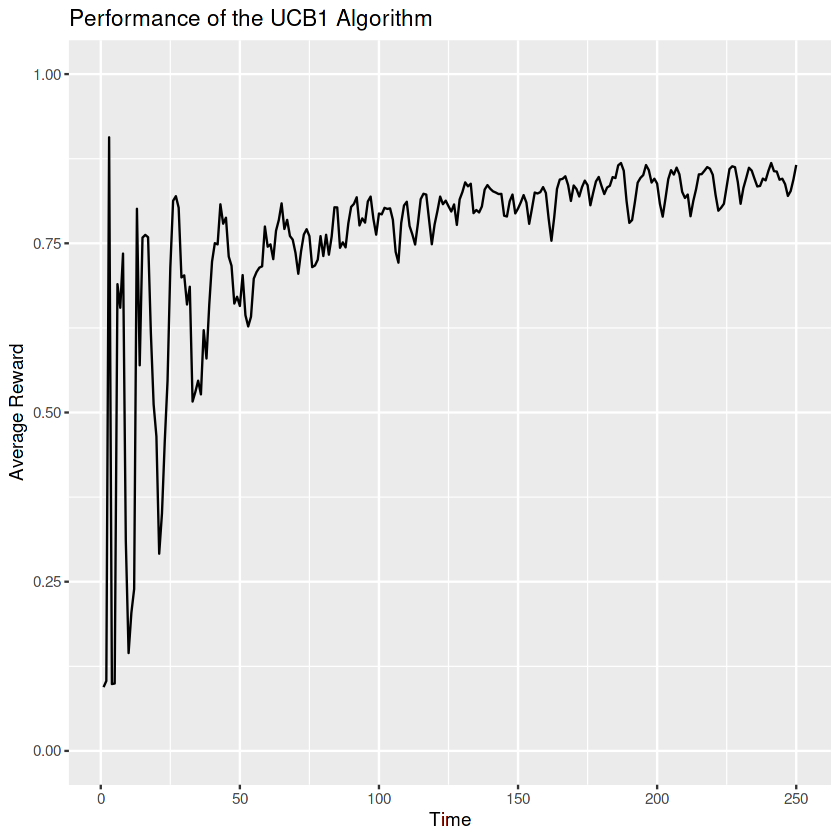

In [2]:
# Plot average reward as a function of time.
stats <- ddply(results,
               c("T"),
               function (df) {mean(df$Reward)})
ggplot(stats, aes(x = T, y = V1)) +
  geom_line() +
  ylim(0, 1) +
  xlab("Time") +
  ylab("Average Reward") +
  ggtitle("Performance of the UCB1 Algorithm")
#ggsave("r/graphs/ucb1_average_reward.pdf")



## Approach1. Plot frequency of selecting correct arm as a function of time.
In here best arm is 2

This graph looks very noisy compared with the graphs we've shown for the epsilon Greedy adn Soft max algorithm. (소프트맥스와 입실론 그리디에 비해서 매우 불안정해 보임. noisy함.)

어떤 arm을 당길지 고를 때 randomness 사용하지도 않는데,
이 noisy는 어디서 온것일 까?

이것은 UCB1알고리즘의 curiosity성질 때문!
UCB1알고리즘은 non-intuitive 비 직관적인 방법으로 동작. 

왜냐하면 best reward평균 갖는것을 기반으로 하는 것이 아닌 불확실성까지 고려하니까.

The little dips you see in this graph come from **UCB backpedaling** and **experimenting with inferior arms**
because it comes to the conclusion that it knows too little about those arms.

This backpedaling matters less and less over time, but it is not alwayspresent in UCB's behavior,

which means that UCB does not become a strictly greedy algorithm even if you have a huge amount of data.

데이터 아주 크면 그리디 알고리즘은 결국 입실론 ㅁ나큼은 explore해도 좋은 것 당기는데 1-입실론 만큼 대부분의 시간을 할혜하여 성능이 낮게 되는데, UCB알고리즘은 그리디 하지 않고 한번씩 당겨봐서 지협적인 optimal에 빠지지 않고 그리디 하게 되지 않도록 함.



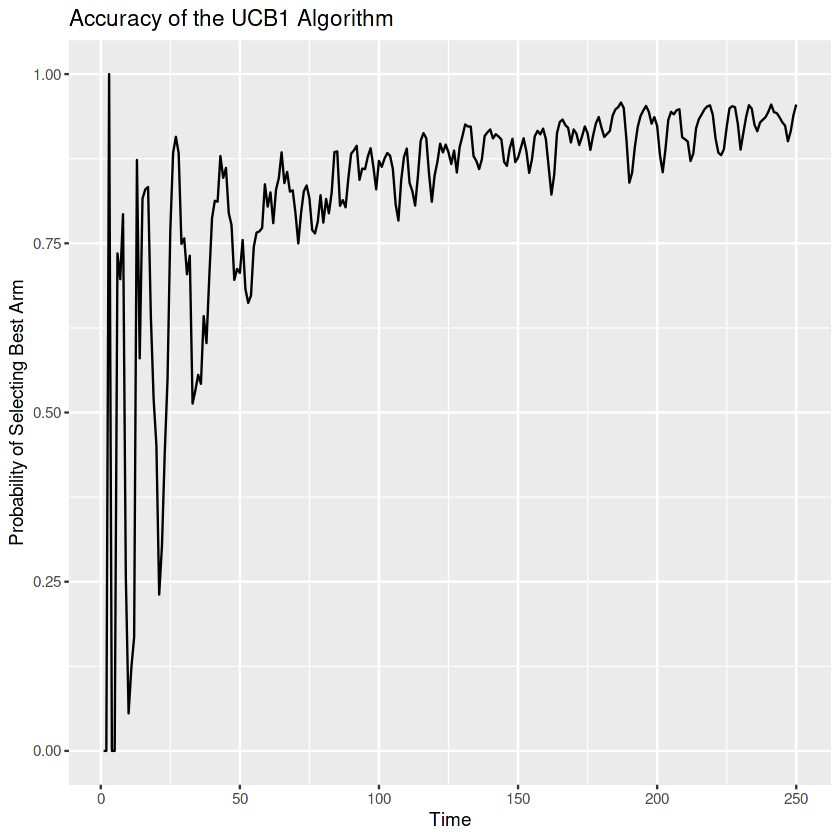

In [3]:
# Plot frequency of selecting correct arm as a function of time.
# In this instance, 2 is the correct arm.
stats <- ddply(results,
               c("T"),
               function (df) {mean(df$ChosenArm == 2)})
ggplot(stats, aes(x = T, y = V1)) +
  geom_line() +
  ylim(0, 1) +
  xlab("Time") +
  ylab("Probability of Selecting Best Arm") +
  ggtitle("Accuracy of the UCB1 Algorithm")
#ggsave("r/graphs/ucb1_average_accuracy.pdf")



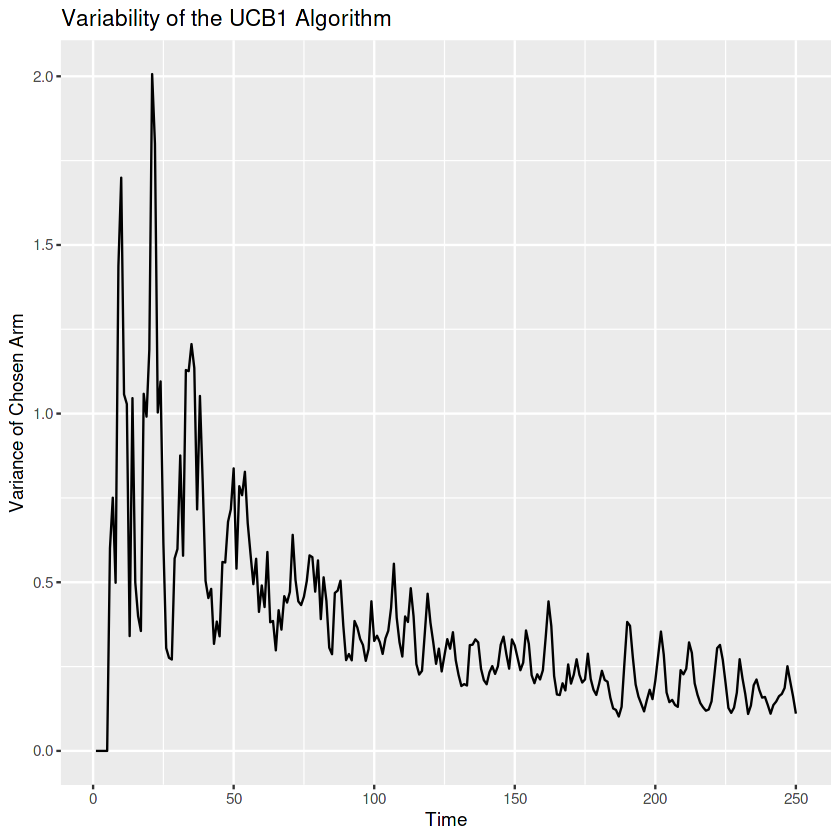

In [4]:
# Plot variance of chosen arms as a function of time.
stats <- ddply(results,
               c("T"),
               function (df) {var(df$ChosenArm)})
ggplot(stats, aes(x = T, y = V1)) +
  geom_line() +
  xlab("Time") +
  ylab("Variance of Chosen Arm") +
  ggtitle("Variability of the UCB1 Algorithm")
#ggsave("r/graphs/ucb1_variance_choices.pdf")



## Approach3. Track the Cumulative Reward at Each pint in Time

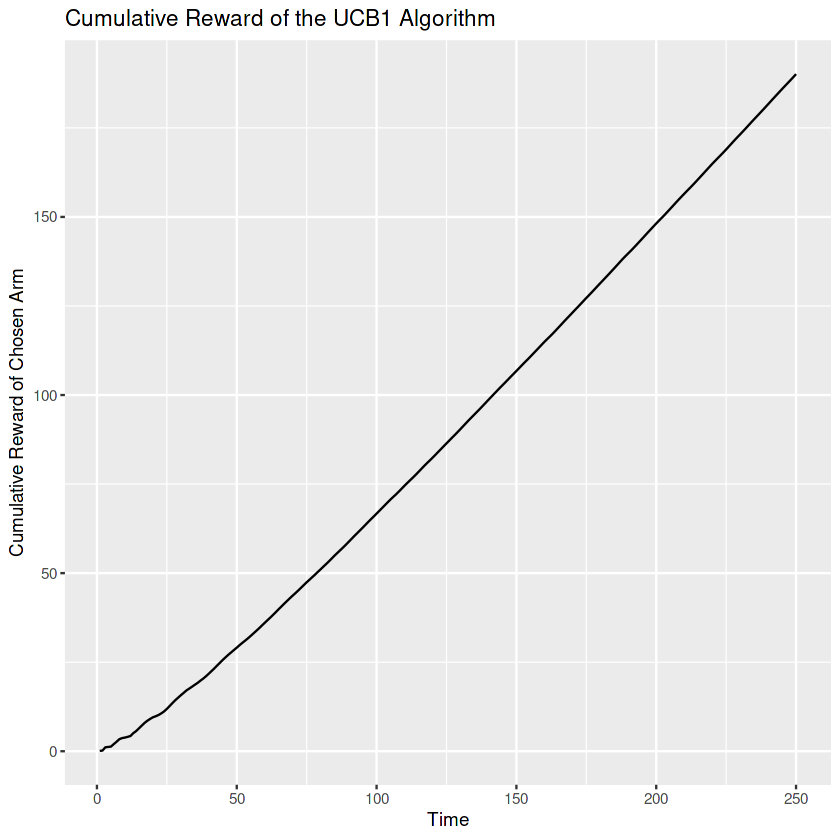

In [5]:
# Plot cumulative reward as a function of time.
stats <- ddply(results,
               c("T"),
               function (df) {mean(df$CumulativeReward)})
ggplot(stats, aes(x = T, y = V1)) +
  geom_line() +
  xlab("Time") +
  ylab("Cumulative Reward of Chosen Arm") +
  ggtitle("Cumulative Reward of the UCB1 Algorithm")
#ggsave("r/graphs/ucb1_cumulative_reward.pdf")